In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [42]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [43]:
#noncategorical data
'State', 'Home.Ownership', 'Fico.Range', 'Employment.Length'

('State', 'Home.Ownership', 'Fico.Range', 'Employment.Length')

In [44]:
loansData.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.000000,2500.000000,2499.000000,2498.000000,2498.000000,2498.000000
mean,12406.500000,12001.573236,5688.931321,10.075661,15244.559648,0.906325
std,7801.544872,7745.320754,3963.118185,4.508644,18308.549795,1.231036
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,NaN,NaN,NaN,NaN
50%,10000.000000,10000.000000,NaN,NaN,NaN,NaN
75%,17000.000000,16000.000000,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [8]:
cleanedLoansData = loansData.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122986e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123ff3cd0>]], dtype=object)

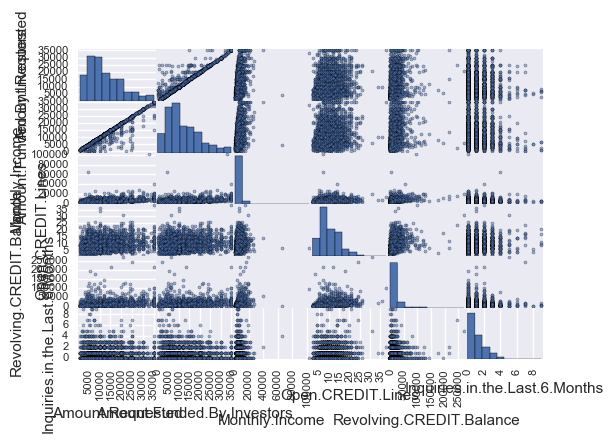

In [46]:
#need to restrict thinks we pairplot against

pd.scatter_matrix(cleanedLoansData)

In [47]:
cleanedLoansData.corr()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
Amount.Requested,1.000000,0.969841,0.391179,0.195942,0.293365,-0.029561
Amount.Funded.By.Investors,0.969841,1.000000,0.374377,0.185826,0.261892,-0.067757
Monthly.Income,0.391179,0.374377,1.000000,0.171396,0.359684,0.033948
Open.CREDIT.Lines,0.195942,0.185826,0.171396,1.000000,0.290085,0.110736
Revolving.CREDIT.Balance,0.293365,0.261892,0.359684,0.290085,1.000000,0.012186
Inquiries.in.the.Last.6.Months,-0.029561,-0.067757,0.033948,0.110736,0.012186,1.000000


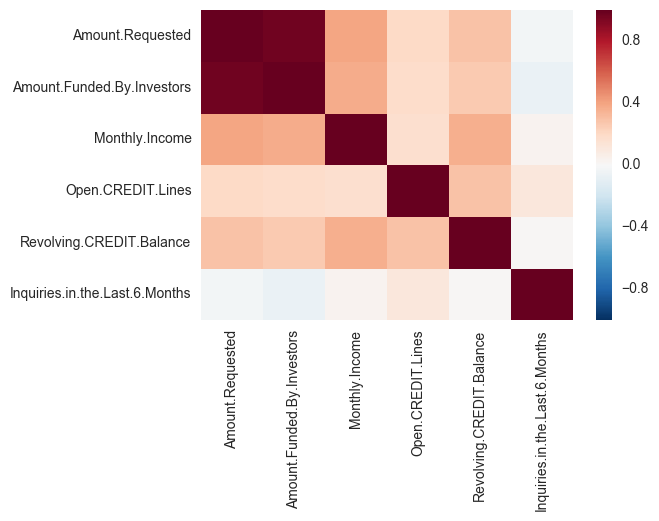

In [10]:
sns.heatmap(cleanedLoansData.corr())

In [48]:
#noncategorical data
# what are good things to get intuition about these: groupby & histogram

for cat in ['State', 'Home.Ownership', 'FICO.Range', 'Employment.Length']:
     print cleanedLoansData.groupby(by=cat).describe()

             Amount.Funded.By.Investors  Amount.Requested  \
State                                                       
AK    count                   11.000000         11.000000   
      mean                 13679.545455      13688.636364   
      std                   6229.143382       6230.021706   
      min                   4200.000000       4200.000000   
      25%                   9625.000000       9625.000000   
      50%                  12200.000000      12200.000000   
      75%                  17487.500000      17500.000000   
      max                  24925.000000      24925.000000   
AL    count                   38.000000         38.000000   
      mean                 11894.035000      12734.210526   
      std                   8248.740545       8451.314109   
      min                      0.000000       1200.000000   
      25%                   5243.750000       5587.500000   
      50%                  10750.000000      10750.000000   
      75%               

In [49]:
# similar to a histogram, take out state because it doesn't add anything

for cat in ['Home.Ownership', 'FICO.Range', 'Employment.Length']:
     print cleanedLoansData.groupby(by=cat)['Amount.Requested'].count()

Home.Ownership
MORTGAGE    1148
OTHER          5
OWN          200
RENT        1145
Name: Amount.Requested, dtype: int64
FICO.Range
640-644      5
645-649      3
650-654      1
655-659      4
660-664    125
665-669    145
670-674    171
675-679    166
680-684    157
685-689    137
690-694    140
695-699    153
700-704    131
705-709    134
710-714    112
715-719     93
720-724    114
725-729     94
730-734     94
735-739     65
740-744     53
745-749     54
750-754     61
755-759     46
760-764     46
765-769     36
770-774     17
775-779     22
780-784     28
785-789     19
790-794     20
795-799     13
800-804     12
805-809     11
810-814      8
815-819      6
820-824      1
830-834      1
Name: Amount.Requested, dtype: int64
Employment.Length
1 year       177
10+ years    653
2 years      244
3 years      235
4 years      192
5 years      202
6 years      163
7 years      127
8 years      108
9 years       72
< 1 year     248
n/a           77
Name: Amount.Requested, dtype: int64


In [33]:
#run box plots on non-categorical variables

In [51]:
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Amount.Funded.By.Investors','Amount_Funded')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Amount.Requested','Amount_Requested')

In [53]:
#predict Amount.Funded.By.Investors

# create a fitted model
lm = smf.ols(formula='Amount_Funded ~ Amount_Requested', data=cleanedLoansData).fit()

lm.params

Intercept           59.866729
Amount_Requested     0.962651
dtype: float64

In [54]:
# when only factor is Amount_Requested
lm.rsquared

0.94059111533060491

In [55]:
df.columns = ['a', 'b', 'c', 'd', 'e']
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Interest.Rate','Interest_Rate')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Loan.Length', 'Loan_Length')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Loan.Purpose', 'Loan_Purpose')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Debt.To.Income.Ratio', 'Debt_Income_Ratio')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Home.Ownership', 'Home_Own')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Monthly.Income', 'Monthly_Income')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('FICO.Range', 'FICO_Range')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Open.CREDIT.Lines', 'Open_Credit_Lines')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Revolving.CREDIT.Balance', 'Revolving_Credit_Lines')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Inquiries.in.the.Last.6.Months', 'Inq_Last_Six_Mo')
cleanedLoansData.columns = cleanedLoansData.columns.str.replace('Employment.Length', 'Employment_Length')

In [ ]:
#run regression with each, get the p-value for each, include only the best in regression